<a href="https://colab.research.google.com/github/utsha95/Greedy-hosting-p-o/blob/main/Greedy_hosting_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
# Mount with google drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [25]:
# Load datasets
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Student_Response.csv')

In [26]:
# Preprocessing: Clean the dataset
df.columns = df.columns.str.replace(r'\n', ' ').str.strip()  # Fix column names
drop_columns = ['Timestamp', 'Name', 'DOB', 'Father\'s job', 'Career focus/Passion']
df_clean = df.drop(columns=drop_columns)


In [27]:
# Encoding categorical features
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df_clean.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_clean[column] = le.fit_transform(df_clean[column].astype(str))
    label_encoders[column] = le


In [28]:
# Selecting a feature to base the greedy algorithm on, e.g., 'Level-Term:1-1 GPA'
# You can change the feature to any other relevant one like 'Academic performance', etc.
df_clean = df_clean.dropna(subset='Gender')  # Ensure no NaN in GPA


In [29]:
# Sorting students by GPA (Greedy approach starts here)
df_sorted = df_clean.sort_values(by='Gender')

In [30]:
# Assume we want to group students into 5 groups (this can be changed)
num_groups = 5
group_size = len(df_sorted) // num_groups
groups = []

In [31]:
# Greedily divide students into groups by GPA proximity
for i in range(0, len(df_sorted), group_size):
    groups.append(df_sorted.iloc[i:i + group_size])

/tmp/ipython-input-2404231933.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(group['Gender'], label=f'Group {idx+1}', fill=True)
/tmp/ipython-input-2404231933.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(group['Gender'], label=f'Group {idx+1}', fill=True)
/tmp/ipython-input-2404231933.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(group['Gender'], label=f'Group {idx+1}', fill=True)
/tmp/ipython-input-2404231933.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(group['Gender'], label=f'Group {idx+1}', fill=True)
/tmp/ipython-input-2404231933.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` t

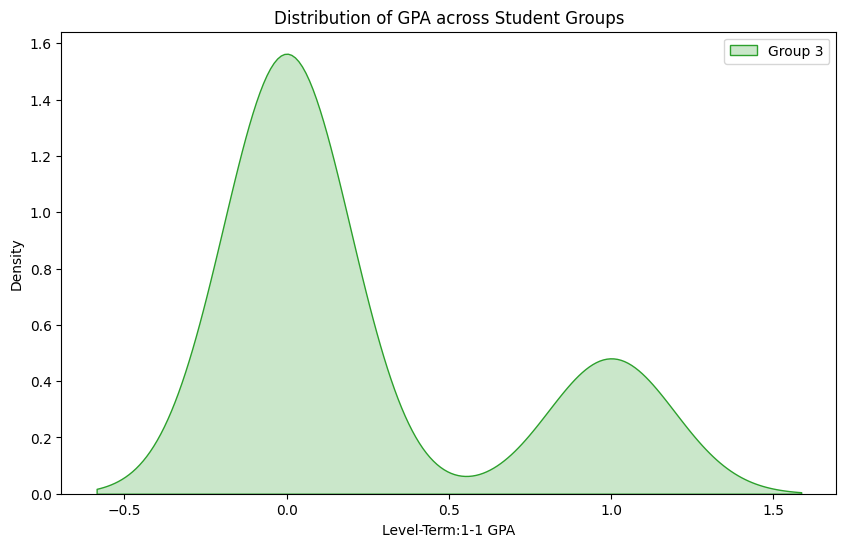

In [32]:
# Visualize the distribution of students' GPA across groups
plt.figure(figsize=(10, 6))
for idx, group in enumerate(groups):
    sns.kdeplot(group['Gender'], label=f'Group {idx+1}', fill=True)
plt.title('Distribution of GPA across Student Groups')
plt.xlabel('Level-Term:1-1 GPA')
plt.ylabel('Density')
plt.legend()
plt.show()

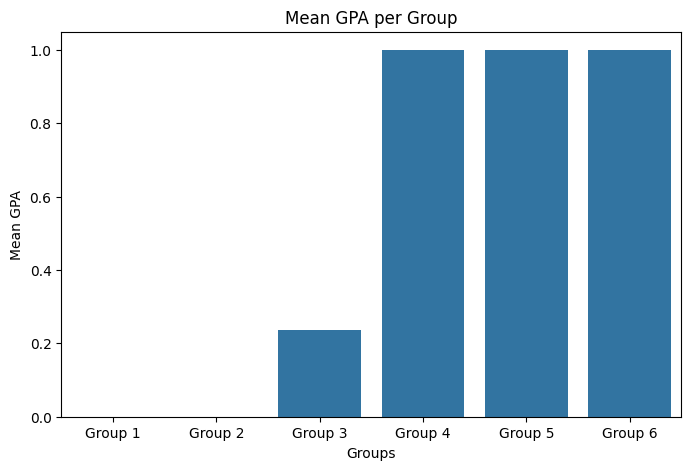

In [33]:
# Visualize group statistics (like mean GPA per group)
group_means = [group['Gender'].mean() for group in groups]
plt.figure(figsize=(8, 5))
sns.barplot(x=[f'Group {i+1}' for i in range(len(groups))], y=group_means)
plt.title('Mean GPA per Group')
plt.ylabel('Mean GPA')
plt.xlabel('Groups')
plt.show()